In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
#importing data sets
df = pd.read_csv("E:\DS\DATA Sets\sharkTank.csv")
df.head()

,episode,pitch_no,company,idea,deal,ashneer,namita,anupam,vineeta,aman,peyush,ghazal
0,1,1,BluePine Industries,Frozen Momos,75 lakhs for 18% equity,Y,N,N,Y,Y,NaN,NaN
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40 lakhs for 50% equity,Y,N,N,Y,N,NaN,NaN
2,1,3,Heart up my Sleeves,Detachable Sleeves,25 lakhs for 30% equity,N,N,Y,Y,N,NaN,NaN
3,2,4,Tagz Foods,Healthy Potato Chips,NaN,Y,N,N,N,N,NaN,NaN
4,2,5,Head and Heart,Brain Development Course,No Deal,N,N,N,N,N,NaN,NaN


In [69]:
df.fillna(value = 0, inplace = True)
df.head()

,episode,pitch_no,company,idea,deal,ashneer,namita,anupam,vineeta,aman,peyush,ghazal
0,1,1,BluePine Industries,Frozen Momos,75 lakhs for 18% equity,Y,N,N,Y,Y,0,0
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40 lakhs for 50% equity,Y,N,N,Y,N,0,0
2,1,3,Heart up my Sleeves,Detachable Sleeves,25 lakhs for 30% equity,N,N,Y,Y,N,0,0
3,2,4,Tagz Foods,Healthy Potato Chips,0,Y,N,N,N,N,0,0
4,2,5,Head and Heart,Brain Development Course,No Deal,N,N,N,N,N,0,0


In [39]:
col_head = df.columns
sharks = np.array(col_head[5:])
sharks

array(['ashneer', 'namita', 'anupam', 'vineeta', 'aman', 'peyush',
       'ghazal'], dtype=object)

In [40]:
total_sharks = len(sharks)
deal_made = []
for i in sharks:
    deal_made.append(df[i][df[i] == "Y"].count())
deal_made

[21, 22, 24, 15, 28, 27, 7]

In [70]:
deals_offered = []
for i in sharks:
    deals_offered.append(df[i][df[i] != 0].count())
deals_offered

[98, 106, 117, 66, 98, 88, 26]

In [71]:
perc = {}
for i in range(total_sharks):
    perc[sharks[i]]= [deals_offered[i],deal_made[i]]
Index = ["Deals offered", "Deals Made"]
dff = pd.DataFrame(perc, index= Index)
dff

,ashneer,namita,anupam,vineeta,aman,peyush,ghazal
Deals offered,98,106,117,66,98,88,26
Deals Made,21,22,24,15,28,27,7


## comparing the deals done by different Sharks

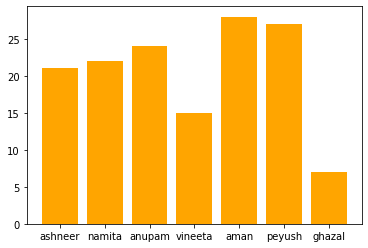

In [41]:
#bar graph
plt.bar(sharks, deal_made, color = "orange")

plt.show()

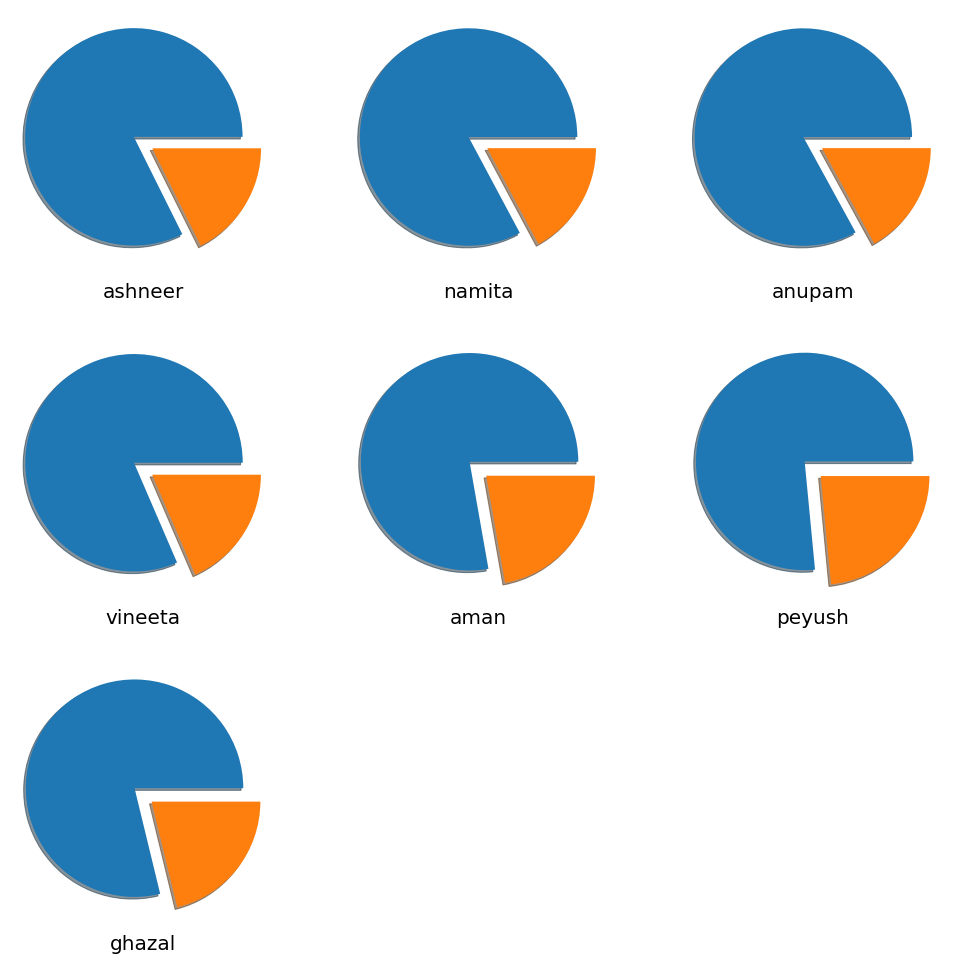

In [65]:
# pie charts
plt.figure(figsize = (17,17))
for i in range(total_sharks):
    plt.subplot(3,3,i+1)
    my_expl = [0.1, 0.1]
    plt.pie(perc[sharks[i]], explode = my_expl, shadow = True)
    plt.xlabel(sharks[i], size = 20)

In [33]:
# All deal pitches
all_deal = df
for i in sharks:
    all_deal.drop(all_deal.index[all_deal[i] == "N"], inplace = True)
all_deal

,episode,pitch_no,company,idea,deal,ashneer,namita,anupam,vineeta,aman,peyush,ghazal
15,6,16,Skippi Pops,Ice-Pops,0,Y,Y,Y,Y,Y,0,0
49,17,50,Find Your Kicks India,Sneaker Resale,0,Y,Y,Y,0,Y,Y,0
63,20,64,IN A CAN,Can Cocktails,1 Crore for 10% equity,Y,Y,Y,0,Y,Y,0
79,25,80,Sunfox Technologies,Portable ECG Device,1 crore for 6% Equity,0,Y,Y,Y,0,Y,Y


In [46]:
# No deal pitches
no_deal = df.loc[df.deal=="No Deal"]
no_deal

,episode,pitch_no,company,idea,deal,ashneer,namita,anupam,vineeta,aman,peyush,ghazal
4,2,5,Head and Heart,Brain Development Course,No Deal,N,N,N,N,N,0,0
5,2,6,Agro tourism,Tourism,No Deal,N,N,N,N,N,0,0
6,3,7,Qzense Labs,Food Freshness Detector,No Deal,N,N,N,N,N,0,0
10,4,11,JhaJi Achaar,Pickle,No Deal,N,N,N,N,N,0,0
13,5,14,Hungry Heads,Restaurant serving 80 types of Maggi,No Deal,N,N,N,N,N,0,0
14,5,15,Shrawani Engineers,Belly Button Shaper,No Deal,N,N,N,N,N,0,0
17,6,18,Hecolll,Pollution Resistant Fabric,No Deal,N,N,N,N,N,0,0
18,7,19,Raising Superstars,Child Development App,No Deal,Y,N,N,N,Y,0,0
19,7,20,Torch-it,Gadgets for visually impaired people,No Deal,N,N,N,N,N,0,0
20,7,21,La Kheer Delhi,Kheer in variety of flavors,No Deal,N,N,N,N,N,0,0


In [51]:
# frequency of deal done by each shark
frequencies = []
for j in sharks:
    freq_p= []
    
    for i in df[j]:
        if i == "Y":
            freq_p.append(1)
        else:
            freq_p.append(0)
    frequencies.append(freq_p)
a = len(frequencies)

In [56]:
# Cumulative frequency
c_f = []

for i in range(a):
    s= []
    s = frequencies[i]
    temp = []
    k = 0
    for j in range(len(s)):
        temp.append(k+ s[j])
        k = k + s[j]
    c_f.append(temp)
   

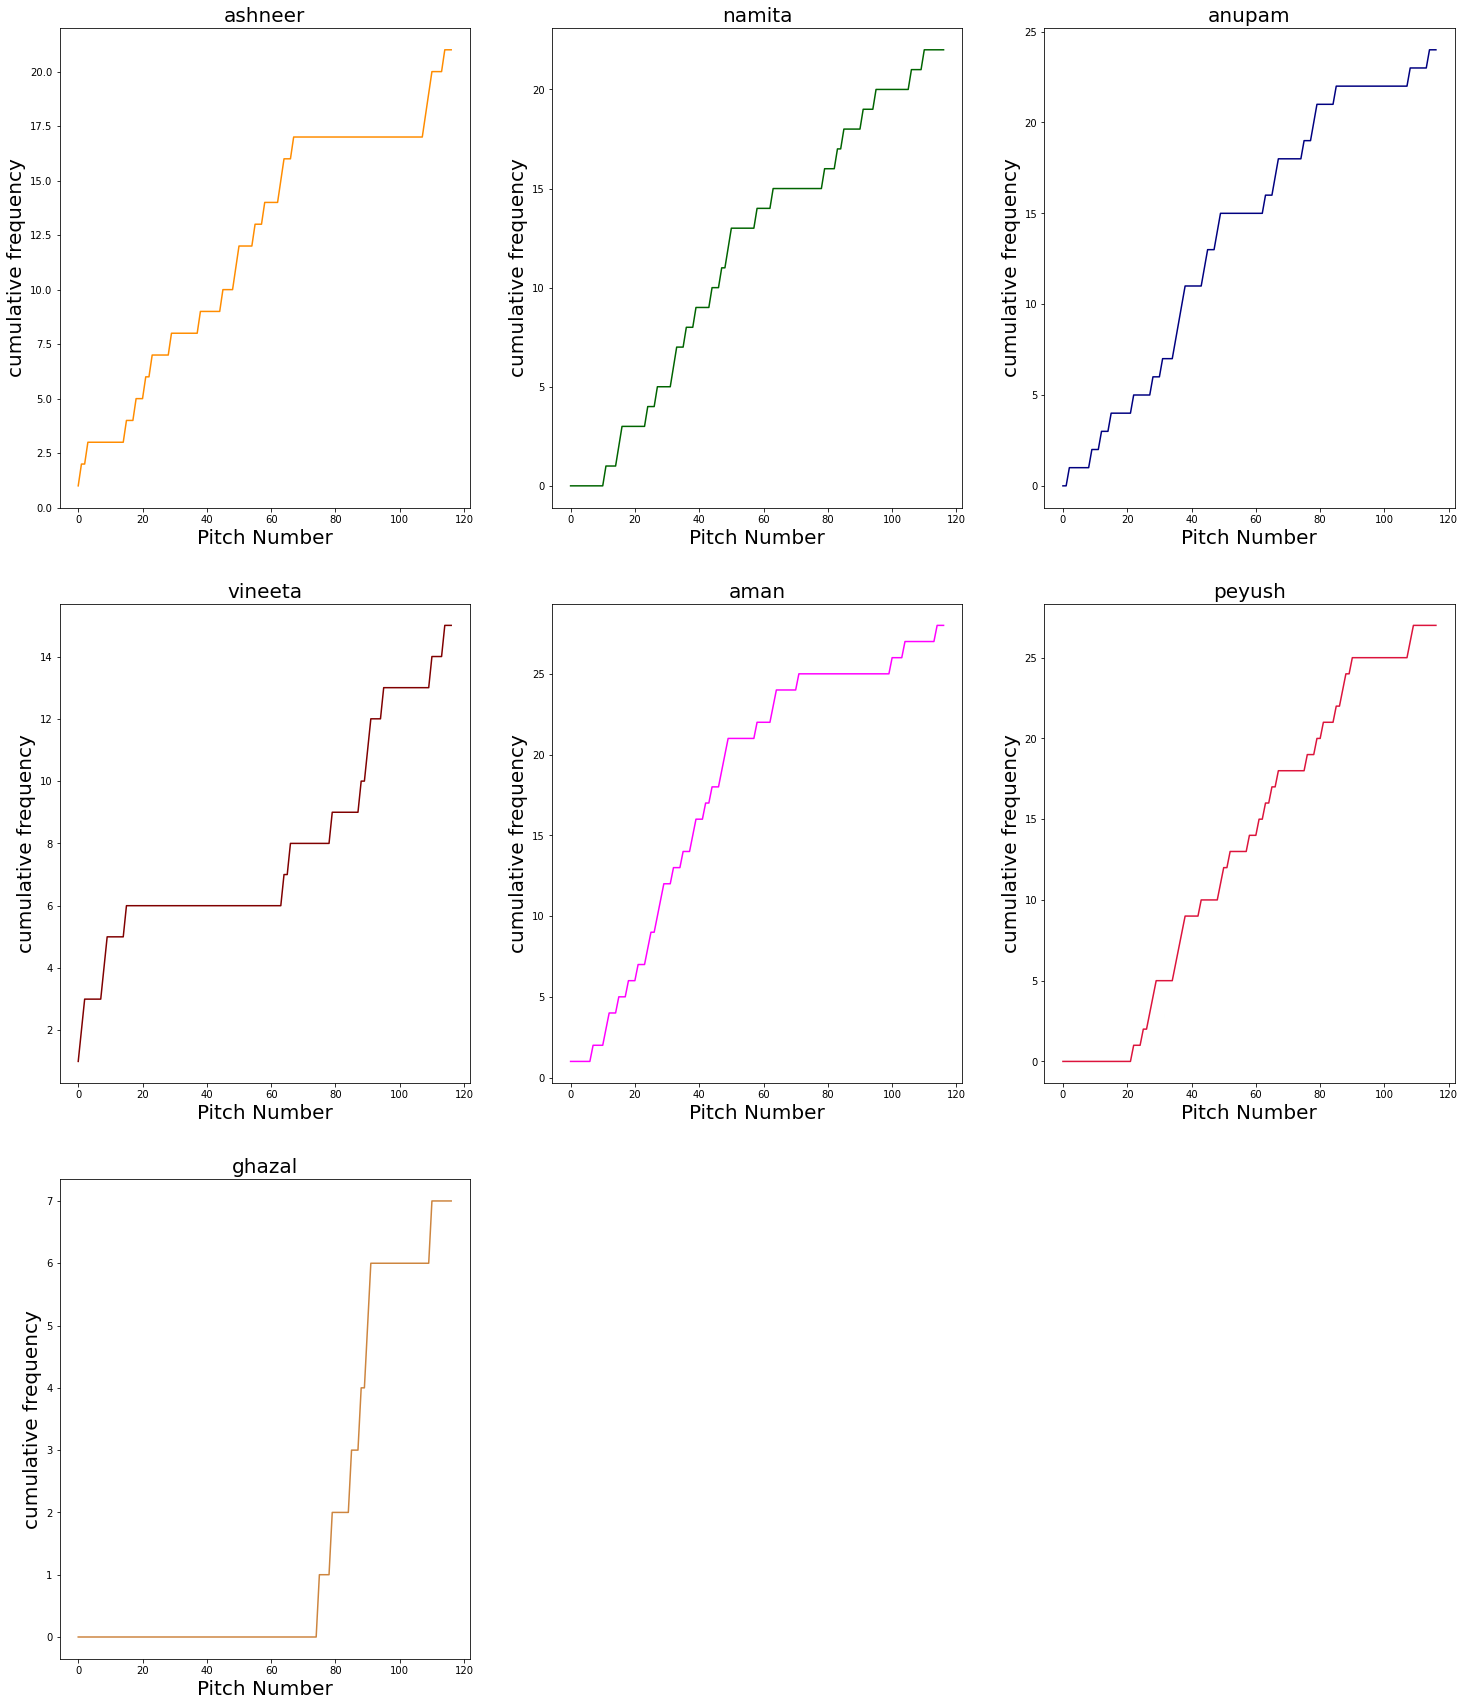

In [78]:
# Shark's Investment w.r.t pitches
mycolors = ["darkorange", "darkgreen","navy", "maroon", "magenta", "crimson","peru"]
plt.figure(figsize = (25,30))
plt.title("Shark's Investment w.r.t time")
for i in range(a):
    plt.subplot(3,3,i+1)
    plt.plot(c_f[i], color = mycolors[i])
    plt.xlabel("Pitch Number", size= 20)
    plt.ylabel("cumulative frequency", size = 20)
    plt.title(sharks[i], size = 20)


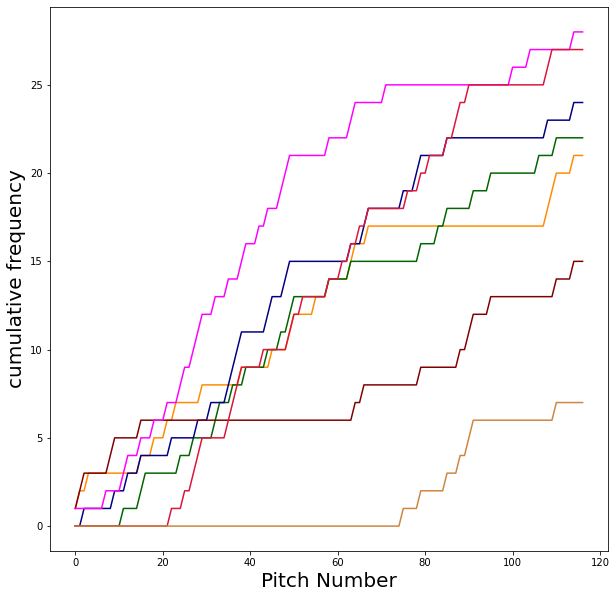

In [77]:
mycolors = ["darkorange", "darkgreen","navy", "maroon", "magenta", "crimson","peru"]
plt.figure(figsize = (10,10))
for i in range(a):
    plt.plot(c_f[i], color = mycolors[i])
    plt.xlabel("Pitch Number", size= 20)
    plt.ylabel("cumulative frequency", size = 20)
    